Zack Owens
Project 2 
TO DO DATE ----------------------------

# 1

## 1.1

Create list of names of images that men. Then create a list of names of images that are women.

In [6]:
cd("..\\img_align_celeba")
pwd()

"c:\\Users\\ZackO\\Desktop\\ParallelPrograming\\ParallelProgrammingClass\\img_align_celeba"

In [16]:
# read in the CSV
using CSV
using DataFrames

df = CSV.read("./list_attr_celeba_2.csv",DataFrame)

Row,id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,000001.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1
2,000002.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,000003.jpg,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,000004.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1
5,000005.jpg,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
6,000006.jpg,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
7,000007.jpg,1,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
8,000008.jpg,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
9,000009.jpg,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1


In [25]:
# split list into men list (hint use lpad)
males = filter(row->row.Male==1,df)
males.id

84434-element Vector{String15}:
 "000003.jpg"
 "000007.jpg"
 "000008.jpg"
 "000012.jpg"
 "000013.jpg"
 "000015.jpg"
 "000016.jpg"
 "000020.jpg"
 "000021.jpg"
 "000023.jpg"
 ⋮
 "202570.jpg"
 "202581.jpg"
 "202585.jpg"
 "202586.jpg"
 "202588.jpg"
 "202589.jpg"
 "202590.jpg"
 "202596.jpg"
 "202597.jpg"

In [26]:
# split list into women list (hint use lpad)
females = filter(row->row.Male==0,df)
females.id

118165-element Vector{String15}:
 "000001.jpg"
 "000002.jpg"
 "000004.jpg"
 "000005.jpg"
 "000006.jpg"
 "000009.jpg"
 "000010.jpg"
 "000011.jpg"
 "000014.jpg"
 "000017.jpg"
 ⋮
 "202584.jpg"
 "202587.jpg"
 "202591.jpg"
 "202592.jpg"
 "202593.jpg"
 "202594.jpg"
 "202595.jpg"
 "202598.jpg"
 "202599.jpg"

## 1.2

Display the last 3 faces of men and the last 3 faces of women.

  0.004867 seconds (253 allocations: 718.453 KiB)
  0.005337 seconds (253 allocations: 720.141 KiB)


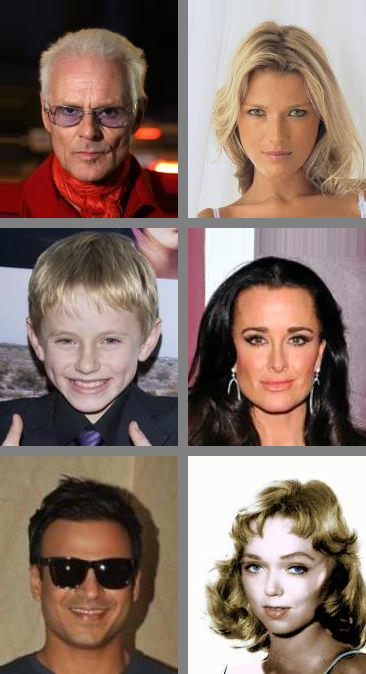

In [54]:
#show last 3 mens and womens faces
using Images, FileIO, Colors

last_3_males = males.id[length(males.id)-2:length(males.id)]
last_3_females = females.id[length(females.id)-2:length(females.id)]

@time begin
    vector_N = Vector{Matrix{RGB{N0f8}}}([])
    for (i, f) in enumerate(last_3_males)
            push!(vector_N, load(f))
    end
end


@time begin
    vector_N_2 = Vector{Matrix{RGB{N0f8}}}([])
    for (i, f) in enumerate(last_3_females)
            push!(vector_N_2, load(f))
    end
end


mosaicview([vector_N ; vector_N_2]; 
fillvalue=0.5, npad=10, ncol=2)

# 2

Compute the means face for men and women seperately. 

## 2.1 (5 points) Use the Hwloc.jl package to display the configuration of the computer you use for the project. Displayed info should include: number of CPU physical and virtual cores, RAM size, and cache info.



In [13]:
using Hwloc

topology()

Machine (2.99 GB)
    Package L#0 P#-1 (2.99 GB)
        NUMANode (2.99 GB)
        L3 (8.0 MB)
            L2 (256.0 kB) + L1 (32.0 kB) + Core L#0 P#-1 
                PU L#0 P#0 
                PU L#1 P#1 
            L2 (256.0 kB) + L1 (32.0 kB) + Core L#1 P#-1 
                PU L#2 P#2 
                PU L#3 P#3 
            L2 (256.0 kB) + L1 (32.0 kB) + Core L#2 P#-1 
                PU L#4 P#4 
                PU L#5 P#5 
            L2 (256.0 kB) + L1 (32.0 kB) + Core L#3 P#-1 
                PU L#6 P#6 
                PU L#7 P#7 

In [64]:
print(Sys.total_memory() / 2^20 /1000, " GB of RAM") 

16.218375 GB of RAM

## 2.2 (65 points) Compute mean face of female celebA faces and male celebA faces, respectively. To do this assignment, follow these steps:
1. Get the vectors of male_faces and female_faces as described in Problem 1.
2. To best use the available resources of the compute you use, consider:
- to compute color or gray mean face,
- to decide the number, N, of celebA faces to be included for the mean face
 calculation (the large the N the better for your project merit).
3. Document the data structures used, how the face files are read, and how the
mean faces are computed in your project notebook.
4. Measure the runtimes of files read and men faces computation.
5. Display mean faces.

In [69]:
function mean_RGB(args...)
    
    c = RGB{Float64}(0,0,0)    
    w = 1.0 / length(args)
    for arg in args
       c += w * arg
    end
    
    return RGB{N0f8}(c)
end

mean_RGB (generic function with 1 method)

In [67]:
# read in the images for men at once
cd("..\\img_align_celeba")
pwd()


@time begin
    vector_N = Vector{Matrix{RGB{N0f8}}}([])
    for (i, f) in enumerate(males.id)
            push!(vector_N, load(f))
    end
end






658.847838 seconds (7.18 M allocations: 19.314 GiB, 0.59% gc time)


In [70]:
@time vector_mean = mean_RGB.(vector_N...)

In [65]:
# read in the images for women at once
@time begin
    vector_N_2 = Vector{Matrix{RGB{N0f8}}}([])
    for (i, f) in enumerate(females.id)
            push!(vector_N_2, load(f))
    end
end


ArgumentError: ArgumentError: syntax df[column] is not supported use df[!, column] instead

In [ ]:
# explore batching approach where 0..x are loaded in then x+1... x*2 are loaded in next

In [ ]:
# usign stats project